In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Generate sample data (replace this with your actual data loading)
np.random.seed(0)
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = np.random.randint(0, 2, 1000)  # Binary target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define models
log_reg = LogisticRegression()
lgbm = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()
catboost_model = cb.CatBoostClassifier(verbose=0)

# Train models
models = {'Log_Reg': log_reg, 'LGBM': lgbm, 'XGB': xgb_model, 'CatBoost': catboost_model}
for name, model in models.items():
    model.fit(X_train, y_train)

# Voting classifiers
vot_lg_xg_ca = VotingClassifier(estimators=[('lg', log_reg), ('xg', xgb_model), ('ca', catboost_model)], voting='soft')
vot_lg_xg = VotingClassifier(estimators=[('lg', log_reg), ('xg', xgb_model)], voting='soft')
vot_g_ca = VotingClassifier(estimators=[('g', xgb_model), ('ca', catboost_model)], voting='soft')
vot_lg_ca = VotingClassifier(estimators=[('lg', log_reg), ('ca', catboost_model)], voting='soft')

voting_models = {'Vot_Lg_Xg_Ca': vot_lg_xg_ca, 'Vot_Lg_Xg': vot_lg_xg, 'Vot_g_Ca': vot_g_ca, 'Vot_Lg_Ca': vot_lg_ca}
for name, model in voting_models.items():
    model.fit(X_train, y_train)

# Evaluate models
metrics = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-score', 'MCC']
results = {metric: [] for metric in metrics}
model_names = list(models.keys()) + list(voting_models.keys())

for model in models.values():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['AUC'].append(roc_auc_score(y_test, y_prob))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['F1-score'].append(f1_score(y_test, y_pred))
    results['MCC'].append(matthews_corrcoef(y_test, y_pred))

for model in voting_models.values():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['AUC'].append(roc_auc_score(y_test, y_prob))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['F1-score'].append(f1_score(y_test, y_pred))
    results['MCC'].append(matthews_corrcoef(y_test, y_pred))

# Create DataFrame
results_df = pd.DataFrame(results, index=model_names)
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

print(results_df)



[LightGBM] [Info] Number of positive: 355, number of negative: 345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4680
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507143 -> initscore=0.028573
[LightGBM] [Info] Start training from score 0.028573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

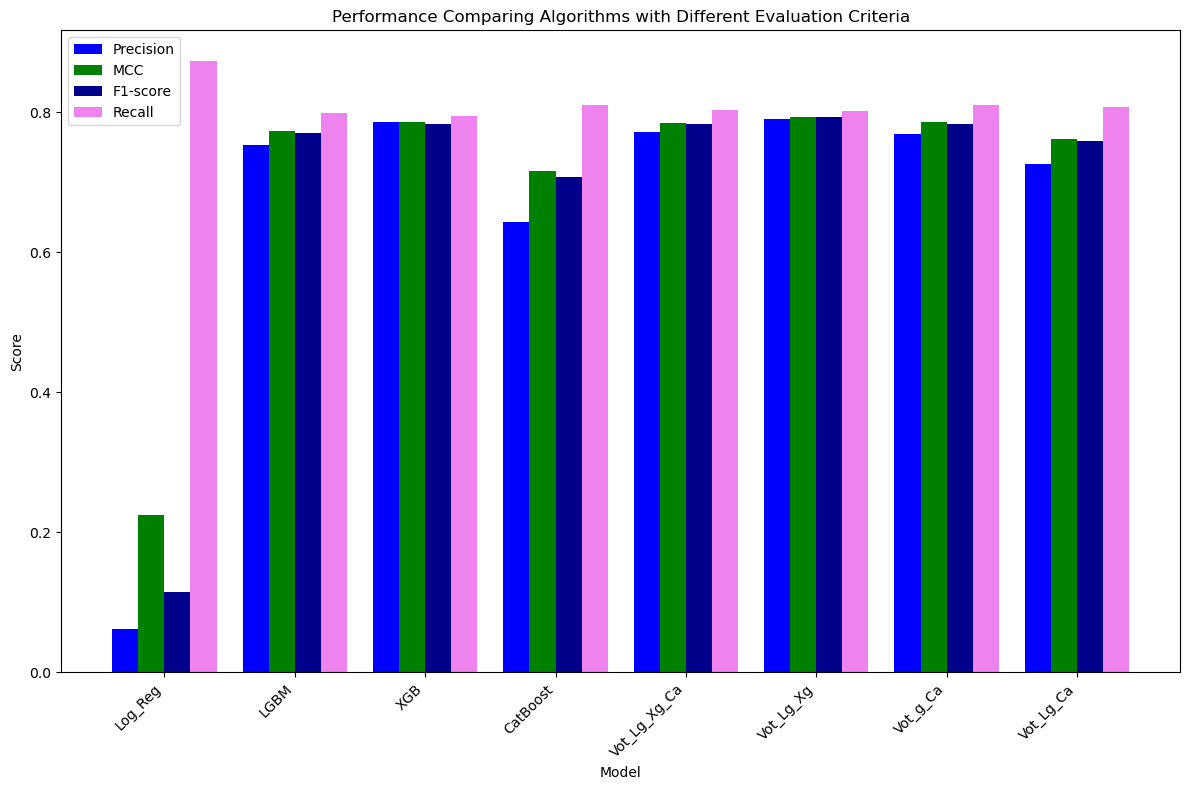

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame with evaluation metrics
data = {
    'Model': ['Log_Reg', 'LGBM', 'XGB', 'CatBoost', 'Vot_Lg_Xg_Ca', 'Vot_Lg_Xg', 'Vot_g_Ca', 'Vot_Lg_Ca'],
    'Precision': [0.0617, 0.7534, 0.7862, 0.6431, 0.7720, 0.7901, 0.7681, 0.7260],
    'MCC': [0.2248, 0.7727, 0.7864, 0.7158, 0.7847, 0.7925, 0.7852, 0.7620],
    'F1-score': [0.1143, 0.7699, 0.7830, 0.7066, 0.7825, 0.7923, 0.7823, 0.7581],
    'Recall': [0.8730, 0.7990, 0.7949, 0.8096, 0.8033, 0.8013, 0.8097, 0.8075]
}

results_df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

metrics = ['Precision', 'MCC', 'F1-score', 'Recall']
colors = ['blue', 'green', 'darkblue', 'violet']  # Define colors
n_metrics = len(metrics)
n_models = len(results_df['Model'])
bar_width = 0.2
x = np.arange(n_models)  # the model positions

# Plot bars for each metric with specified colors
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric, color=color)

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance Comparing Algorithms with Different Evaluation Criteria')
ax.set_xticks(x + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(results_df['Model'])
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, matthews_corrcoef
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assume X_train, X_test, y_train, y_test are already defined
# For binary classification, make sure y_train and y_test are in the correct format

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Create DataFrame
data = {
    'Model': ['Keras'],
    'Accuracy': [accuracy],
    'AUC': [auc],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'MCC': [mcc]
}

results_df = pd.DataFrame(data)

# Highlighting the DataFrame for display
def highlight_max(s):
    is_max = s == s.max()
    return ['color: red' if v else '' for v in is_max]

styled_df = results_df.style.apply(highlight_max, subset=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-score', 'MCC'])

print(styled_df)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5164 - loss: 0.7075
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 0.6863
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5310 - loss: 0.6849
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 0.6783
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5612 - loss: 0.6820
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5547 - loss: 0.6719
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 0.6734
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5808 - loss: 0.6694
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6150 - loss: 0.6575
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6020 - loss: 0.6546
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
